<a href="https://colab.research.google.com/github/esma-nur/Anomaly-Detection-Anomalib-Library/blob/main/Network_Karsilastirma1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Network_Karsilastirma
 Bir görüntü sınıflandırma derin öğrenme modeli oluşturmanız istenmektedir. Veri kümesi
 olarak Cifar-10 kullanılacaktır. Cifar-10 veri kümesi 60.000 görüntüden oluşan, 10 tane sınıfa
 sahip bir veri kümesidir. (Bknz: https://www.cs.toronto.edu/~kriz/cifar.html) Sizden istenilen 2
 ana görev bulunmaktadır.

**Multi layer perceptron (simple sequential) bir network tasarımı:**

 ● Modelgirdi olarak görsel almalı, çıktı olarak Cifar-10 veri kümesinde bulunan
 10 sınıftan birinin tahminini üretmelidir.

 ● ModelCifar-10 veri kümesi ile eğitilmelidir. Veri kümesinin %30’u test verisi
 olarak, geri kalanı eğitim verisi olarak kullanılmalıdır.

 ● Bumodeliniz sadece 5 adet full connected hidden layerlardan oluşmalıdır.
 CNN(convolutional layer’lar) içermemelidir. Hidden layerlardaki perceptron
 (nöron) sayısı 128 adeti geçmemelidir.

 ● Batchsize değeri isteğe bağlı olarak belirlenebilir. Epoch sayısı 5 olacak
 şekilde ayarlanması gerekmektedir.

 ● Hidden layerlar arasına regularization işlemleri isteğe bağlı uygulanabilir.

 ● Modelbaşarısı makine öğrenmesi metriklerine göre raporlanmalıdır.
 (Confusion matrix, F1 Score vb.)

 ● Modeleğitim grafikleri çıkarılmalıdır.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout


In [ ]:
from tensorflow.keras.datasets import cifar10

Training data shape: (50000, 32, 32, 3)


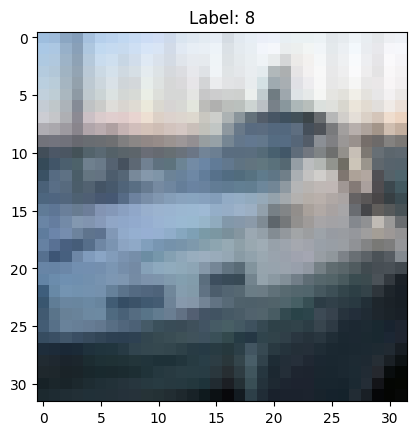

In [ ]:
# CIFAR-10 veri setini yükleyelim
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Training data shape:", x_train.shape)

# Verisetteki bir görüntüyü görselleştirelim
index = 2  # Görüntünün indexini ayarla
# Görüntü ve etiketini al
image = x_test[index]
label = y_test[index]

# Görüntüyü göster
plt.imshow(image)
plt.title(f'Label: {label[0]}')
plt.axis('on')  # Eksenleri göster
plt.show()


In [ ]:
# Sınıf isimlerini tanımlıyoruz
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Veriyi normalize ettik [0,1] aralığına
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Etiketleri one-hot encode yapalım
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Eğitim verisi %70, test verisini %30 olacak şekilde ayarlandı
split_index = int(0.7 * len(x_train))
x_train, x_val = x_train[:split_index], x_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

In [ ]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential()
weight_decay = 0.0001

# Giriş katmanı (Flatten - görüntüyü düzleştirir)
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# İlk fully connected hidden layer
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# İkinci fully connected hidden layer
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# Üçüncü fully connected hidden layer
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# Dördüncü fully connected hidden layer
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# Besinci fully connected hidden layer
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))


# Çıktı katmanı (10 sınıf için softmax sınıflandırma için kullanılan aktivasyon)
model.add(layers.Dense(10, activation='softmax'))

# Modeli özetleyelim
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,466 (951.04 KB)

 Trainable params: 243,466 (951.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Modeli derle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Modeli eğitiyoruz
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_val, y_val))

# Modeli değerlendirelim
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Train accuracy:', train_acc)


# Modelin ağırlıklarını kaydetme
model.save_weights('model.weights.h5')


Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2189 - loss: 2.1058 - val_accuracy: 0.3410 - val_loss: 1.8530
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3455 - loss: 1.8364 - val_accuracy: 0.3653 - val_loss: 1.7752
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3725 - loss: 1.7704 - val_accuracy: 0.3821 - val_loss: 1.7308
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3975 - loss: 1.7030 - val_accuracy: 0.3987 - val_loss: 1.7145
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4063 - loss: 1.6672 - val_accuracy: 0.4072 - val_loss: 1.6596
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4260 - loss: 1.6054
Train accuracy: 0.42634284496307373


In [ ]:
# Sınıf isimleri
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Modeli test verisi ile değerlendirme
y_pred_prob = model.predict(x_test)  # Olasılık tahminleri
y_pred = np.argmax(y_pred_prob, axis=1)  # Kesin sınıf tahminleri
y_true = np.argmax(y_test, axis=1)  # Gerçek sınıf etiketleri
# Confusion matrix ve sınıflandırma raporu
print("Classification Report:\n \n", classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
 
               precision    recall  f1-score   support

    Airplane       0.53      0.45      0.49      1000
  Automobile       0.55      0.54      0.54      1000
        Bird       0.35      0.11      0.17      1000
         Cat       0.28      0.23      0.26      1000
        Deer       0.34      0.44      0.38      1000
         Dog       0.34      0.41      0.38      1000
        Frog       0.49      0.34      0.40      1000
       Horse       0.37      0.56      0.45      1000
        Ship       0.53      0.60      0.56      1000
       Truck       0.44      0.54      0.48      1000

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.41     10000
weighted avg       0.42      0.42      0.41     10000

Confusion Matrix:
 [[451  34  24  34  30  28  16 106 182  95]
 [ 30 541   1  32  20  26  12  32  98 208]
 [109  33 111  69 244 119  88 162  40  25]
 [ 30  34  36 234  96 272 

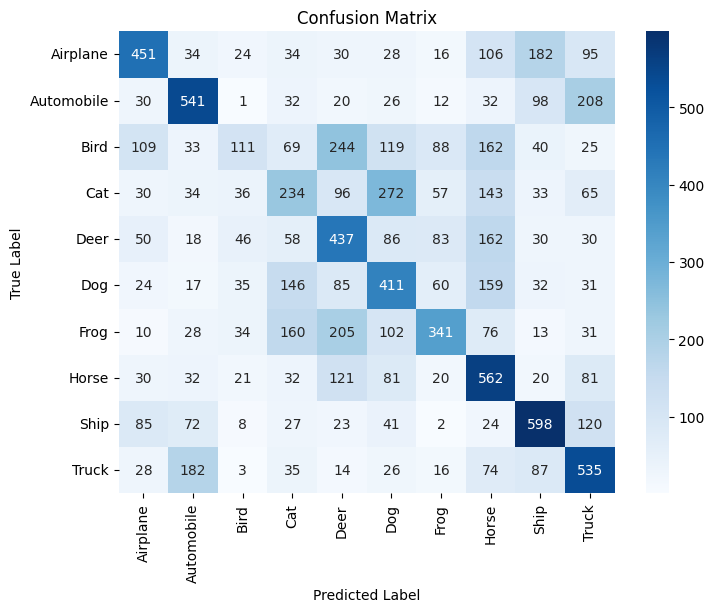

In [ ]:
# Confusion matrix'in görselleştirilmesi
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

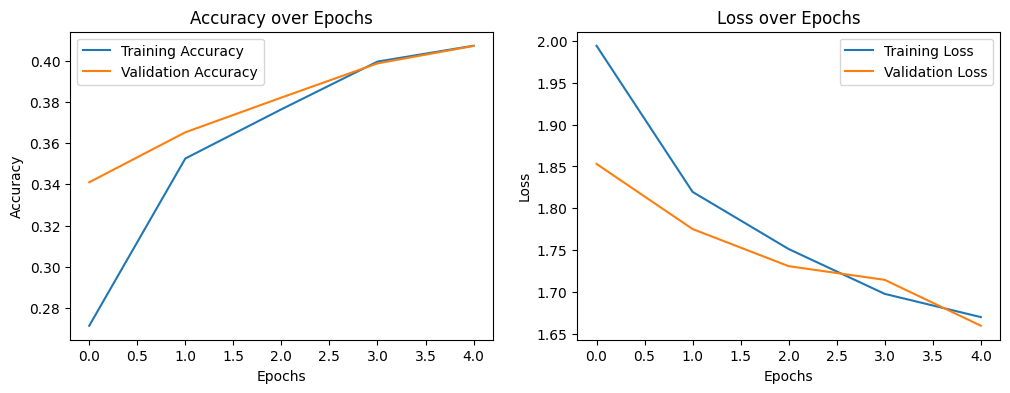

In [ ]:
# Eğitim ve doğrulama doğruluklarını ve kayıplarını grafikleştirme
plt.figure(figsize=(12, 4))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


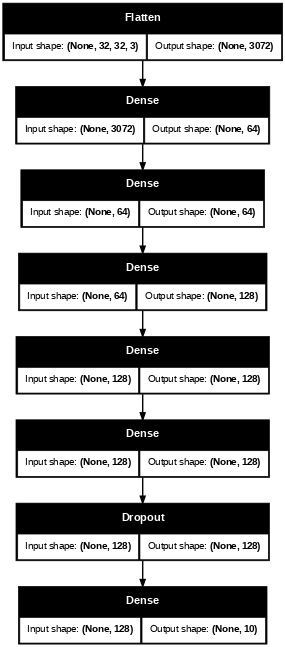

In [ ]:
from tensorflow.keras.utils import plot_model

# Model mimarisini görselleştirme
plot_model(model, show_shapes=True, to_file='model_architecture.png', dpi=50)
